In [1]:
import os
from textwrap import wrap

import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import plotly.express as px
import requests
import seaborn as sns
from PIL import Image
from nltk.corpus import stopwords
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# from wordcloud import WordCloud

In [2]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('words')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/stepantytarenko/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/stepantytarenko/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/stepantytarenko/nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/stepantytarenko/nltk_data...
[nltk_data] Downloading package words to
[nltk_data]     /Users/stepantytarenko/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [69]:
nltk.data.path.append('../../Resources/')

In [18]:
# ! ls ../../Data/boost_labelled

news1.csv news3.csv news5.csv news7.csv news9.csv
news2.csv news4.csv news6.csv news8.csv


In [3]:
BASIC_PATH = '../data/boost_labelled'

In [4]:
filenames = []

In [5]:
for filename in os.listdir(BASIC_PATH):
    if not filename.startswith('.'):
        filenames.append(f'{BASIC_PATH}/{filename}')
filenames

['../data/boost_labelled/news3.csv',
 '../data/boost_labelled/news2.csv',
 '../data/boost_labelled/news1.csv',
 '../data/boost_labelled/news5.csv',
 '../data/boost_labelled/news4.csv',
 '../data/boost_labelled/news6.csv',
 '../data/boost_labelled/news7.csv',
 '../data/boost_labelled/news9.csv',
 '../data/boost_labelled/news8.csv']

In [6]:
data = pd.DataFrame()
for filename in filenames:
    print('Reading', filename)
    df = pd.read_csv(filename, sep=';', header=0)
    data = pd.concat([data, df]).reset_index(drop=True)
data

Reading ../data/boost_labelled/news3.csv
Reading ../data/boost_labelled/news2.csv
Reading ../data/boost_labelled/news1.csv
Reading ../data/boost_labelled/news5.csv
Reading ../data/boost_labelled/news4.csv
Reading ../data/boost_labelled/news6.csv
Reading ../data/boost_labelled/news7.csv
Reading ../data/boost_labelled/news9.csv
Reading ../data/boost_labelled/news8.csv


,source,title,published_at,currencies,News value,full_news_url,description
0,Executive Chairman,RT @justmoon: This is a post I've been wanting...,2022-12-07T19:13:11Z,XRP,0.0,https://cryptopanic.com/news/17094657/RT-justm...,NaN
1,CoinTelegraph,Bitcoin options data shows bulls aiming for $1...,2022-12-07T19:12:11Z,BTC,1.0,https://cryptopanic.com/news/17094680/Bitcoin-...,<p>BTC bulls could secure a $130 million profi...
2,The Daily Hodl,Crypto Exchange Coinbase Adds Support for Two ...,2022-12-07T19:05:54Z,"ETH,RPL",0.0,https://cryptopanic.com/news/17094653/Crypto-E...,<p>Top US crypto exchange Coinbase has given s...
3,The Daily Hodl,BitKeep Wallet Goes Live With .Bayc and Other ...,2022-12-07T19:05:16Z,ETH,0.0,https://cryptopanic.com/news/17094654/BitKeep-...,"<p>December 5, 2022 As simplified wallet addre..."
4,Bitcoin Magazine,Kazakhstan Presses On With Restrictive Bitcoin...,2022-12-07T18:53:00Z,BTC,0.0,https://cryptopanic.com/news/17094603/Kazakhst...,<p>A bill that would create new licensing and ...
...,...,...,...,...,...,...,...
1673,Feed - Cryptopotato.Com,"OKX Proof-of-Reserves Report: Bitcoin, Ether, ...",2022-12-23T18:10:53Z,USDT,1.0,https://cryptopanic.com/news/17225884/OKX-Proo...,<p>The recently published Merkle tree PoR prog...
1674,CryptoSlate,Bitcoin miners increased hash rate and product...,2022-12-23T18:00:30Z,BTC,0.0,https://cryptopanic.com/news/17225863/Bitcoin-...,<p>The price of Bitcoin (BTC) fell by 64.68% t...
1675,Co-founder of Ethereum,Looking forward to seeing who the next CEO is ...,2022-12-23T17:57:19Z,ETH,0.0,https://cryptopanic.com/news/17225833/Looking-...,NaN
1676,The Daily Hodl,Twitter Adds Bitcoin (BTC) and Ethereum (ETH) ...,2022-12-23T17:55:29Z,"BTC,ETH",1.0,https://cryptopanic.com/news/17225843/Twitter-...,<p>Social media giant Twitter is adding Bitcoi...


<Axes: xlabel='News value', ylabel='count'>

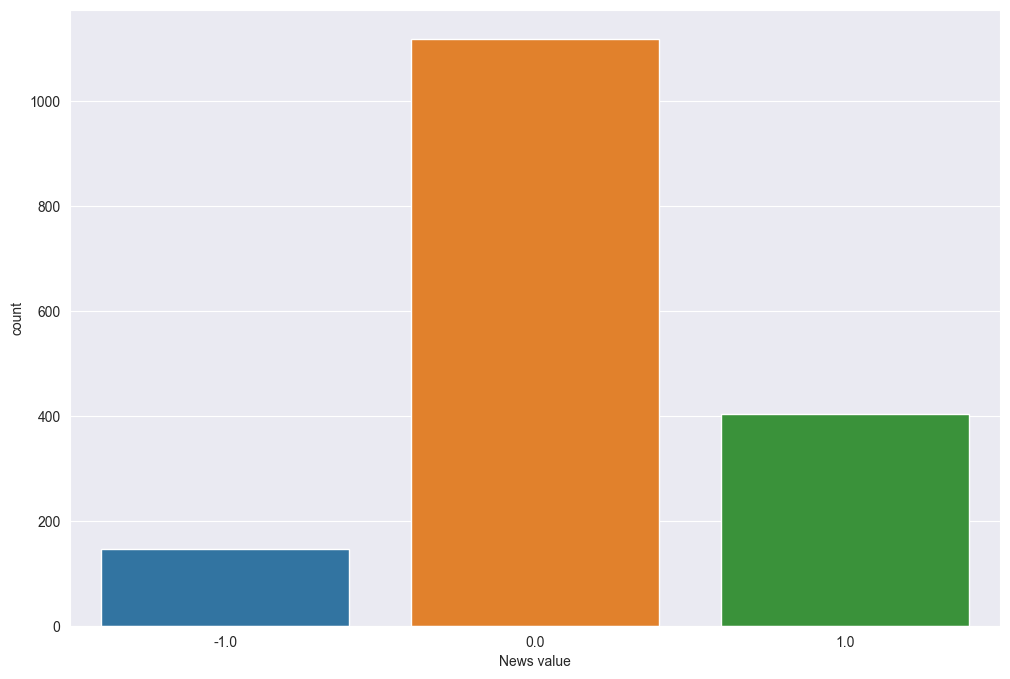

In [8]:
plt.figure(figsize=(12, 8))
sns.countplot(x=data['News value'])

In [15]:
from io import StringIO
from html.parser import HTMLParser

class MLStripper(HTMLParser):
    def __init__(self):
        super().__init__()
        self.reset()
        self.strict = False
        self.convert_charrefs= True
        self.text = StringIO()
    def handle_data(self, d):
        self.text.write(d)
    def get_data(self):
        return self.text.getvalue()

def strip_tags(html):
    s = MLStripper()
    s.feed(html)
    return s.get_data()

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1336 entries, 0 to 1335
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   source         1318 non-null   object 
 1   title          1330 non-null   object 
 2   published_at   1318 non-null   object 
 3   currencies     1288 non-null   object 
 4   News value     1334 non-null   float64
 5   full_news_url  1336 non-null   object 
 6   description    1336 non-null   object 
dtypes: float64(1), object(6)
memory usage: 73.2+ KB


In [17]:
data = data[~data['description'].isna()]
data

,source,title,published_at,currencies,News value,full_news_url,description
0,CoinTelegraph,Bitcoin options data shows bulls aiming for $1...,2022-12-07T19:12:11Z,BTC,1.0,https://cryptopanic.com/news/17094680/Bitcoin-...,BTC bulls could secure a $130 million profit i...
1,The Daily Hodl,Crypto Exchange Coinbase Adds Support for Two ...,2022-12-07T19:05:54Z,"ETH,RPL",0.0,https://cryptopanic.com/news/17094653/Crypto-E...,Top US crypto exchange Coinbase has given supp...
2,The Daily Hodl,BitKeep Wallet Goes Live With .Bayc and Other ...,2022-12-07T19:05:16Z,ETH,0.0,https://cryptopanic.com/news/17094654/BitKeep-...,"December 5, 2022 As simplified wallet addresse..."
3,Bitcoin Magazine,Kazakhstan Presses On With Restrictive Bitcoin...,2022-12-07T18:53:00Z,BTC,0.0,https://cryptopanic.com/news/17094603/Kazakhst...,A bill that would create new licensing and ele...
4,CoinTelegraph,The blockchain trilemma: Can it ever be tackled?,2022-12-07T18:33:00Z,"ETH,MATIC",0.0,https://cryptopanic.com/news/17094549/The-bloc...,Blockchain trilemma is arguably the hardest te...
...,...,...,...,...,...,...,...
1331,U.Today,Ethereum (ETH) Price Analysis for December 23,2022-12-23T20:00:00Z,ETH,0.0,https://cryptopanic.com/news/17226113/Ethereum...,How great are chances for continued rise of Et...
1332,ZyCrypto,Digital Assets Amongst Vulnerabilities Within ...,2022-12-23T19:47:30Z,"ETH,XRP",0.0,https://cryptopanic.com/news/17226085/Digital-...,The Financial Stability Oversight Council (FSO...
1333,The Daily Hodl,"Cardano, Litecoin and Monero Will Not Be Added...",2022-12-23T19:41:41Z,"BTC,ETH,ADA,LTC,XMR",1.0,https://cryptopanic.com/news/17226084/Cardano-...,A top executive of peer-to-peer crypto exchang...
1334,ZyCrypto,Binance plans to invest in India’s web3 startu...,2022-12-23T19:24:08Z,"BTC,ETH,XRP",1.0,https://cryptopanic.com/news/17226053/Binance-...,Binance’s Chief Technology Officer (CTO) Rohit...


In [18]:
data = data.drop_duplicates(['description'])
data

,source,title,published_at,currencies,News value,full_news_url,description
0,CoinTelegraph,Bitcoin options data shows bulls aiming for $1...,2022-12-07T19:12:11Z,BTC,1.0,https://cryptopanic.com/news/17094680/Bitcoin-...,BTC bulls could secure a $130 million profit i...
1,The Daily Hodl,Crypto Exchange Coinbase Adds Support for Two ...,2022-12-07T19:05:54Z,"ETH,RPL",0.0,https://cryptopanic.com/news/17094653/Crypto-E...,Top US crypto exchange Coinbase has given supp...
2,The Daily Hodl,BitKeep Wallet Goes Live With .Bayc and Other ...,2022-12-07T19:05:16Z,ETH,0.0,https://cryptopanic.com/news/17094654/BitKeep-...,"December 5, 2022 As simplified wallet addresse..."
3,Bitcoin Magazine,Kazakhstan Presses On With Restrictive Bitcoin...,2022-12-07T18:53:00Z,BTC,0.0,https://cryptopanic.com/news/17094603/Kazakhst...,A bill that would create new licensing and ele...
4,CoinTelegraph,The blockchain trilemma: Can it ever be tackled?,2022-12-07T18:33:00Z,"ETH,MATIC",0.0,https://cryptopanic.com/news/17094549/The-bloc...,Blockchain trilemma is arguably the hardest te...
...,...,...,...,...,...,...,...
1331,U.Today,Ethereum (ETH) Price Analysis for December 23,2022-12-23T20:00:00Z,ETH,0.0,https://cryptopanic.com/news/17226113/Ethereum...,How great are chances for continued rise of Et...
1332,ZyCrypto,Digital Assets Amongst Vulnerabilities Within ...,2022-12-23T19:47:30Z,"ETH,XRP",0.0,https://cryptopanic.com/news/17226085/Digital-...,The Financial Stability Oversight Council (FSO...
1333,The Daily Hodl,"Cardano, Litecoin and Monero Will Not Be Added...",2022-12-23T19:41:41Z,"BTC,ETH,ADA,LTC,XMR",1.0,https://cryptopanic.com/news/17226084/Cardano-...,A top executive of peer-to-peer crypto exchang...
1334,ZyCrypto,Binance plans to invest in India’s web3 startu...,2022-12-23T19:24:08Z,"BTC,ETH,XRP",1.0,https://cryptopanic.com/news/17226053/Binance-...,Binance’s Chief Technology Officer (CTO) Rohit...


In [19]:
data['description'] = data['description'].apply(strip_tags)
data = data.reset_index(drop=True)
data

,source,title,published_at,currencies,News value,full_news_url,description
0,CoinTelegraph,Bitcoin options data shows bulls aiming for $1...,2022-12-07T19:12:11Z,BTC,1.0,https://cryptopanic.com/news/17094680/Bitcoin-...,BTC bulls could secure a $130 million profit i...
1,The Daily Hodl,Crypto Exchange Coinbase Adds Support for Two ...,2022-12-07T19:05:54Z,"ETH,RPL",0.0,https://cryptopanic.com/news/17094653/Crypto-E...,Top US crypto exchange Coinbase has given supp...
2,The Daily Hodl,BitKeep Wallet Goes Live With .Bayc and Other ...,2022-12-07T19:05:16Z,ETH,0.0,https://cryptopanic.com/news/17094654/BitKeep-...,"December 5, 2022 As simplified wallet addresse..."
3,Bitcoin Magazine,Kazakhstan Presses On With Restrictive Bitcoin...,2022-12-07T18:53:00Z,BTC,0.0,https://cryptopanic.com/news/17094603/Kazakhst...,A bill that would create new licensing and ele...
4,CoinTelegraph,The blockchain trilemma: Can it ever be tackled?,2022-12-07T18:33:00Z,"ETH,MATIC",0.0,https://cryptopanic.com/news/17094549/The-bloc...,Blockchain trilemma is arguably the hardest te...
...,...,...,...,...,...,...,...
1331,U.Today,Ethereum (ETH) Price Analysis for December 23,2022-12-23T20:00:00Z,ETH,0.0,https://cryptopanic.com/news/17226113/Ethereum...,How great are chances for continued rise of Et...
1332,ZyCrypto,Digital Assets Amongst Vulnerabilities Within ...,2022-12-23T19:47:30Z,"ETH,XRP",0.0,https://cryptopanic.com/news/17226085/Digital-...,The Financial Stability Oversight Council (FSO...
1333,The Daily Hodl,"Cardano, Litecoin and Monero Will Not Be Added...",2022-12-23T19:41:41Z,"BTC,ETH,ADA,LTC,XMR",1.0,https://cryptopanic.com/news/17226084/Cardano-...,A top executive of peer-to-peer crypto exchang...
1334,ZyCrypto,Binance plans to invest in India’s web3 startu...,2022-12-23T19:24:08Z,"BTC,ETH,XRP",1.0,https://cryptopanic.com/news/17226053/Binance-...,Binance’s Chief Technology Officer (CTO) Rohit...


In [20]:
STOPWORDS = stopwords.words('english')

In [22]:
top_N = 25
a = data['description'].str.lower().str.replace(r'[^\w\s]', '', regex=True).str.cat(sep=' ')
words = list(filter(lambda w: w not in STOPWORDS, nltk.tokenize.word_tokenize(a)))
word_dist = nltk.FreqDist(words)
freq_title = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])
freq_title

,Word,Frequency
0,bitcoin,654
1,crypto,543
2,price,413
3,market,330
4,btc,253
5,ethereum,248
6,trading,206
7,new,179
8,exchange,167
9,cryptocurrency,158


In [23]:
import matplotlib
matplotlib.rcParams.update({'font.size': 22})

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'bitcoin'),
  Text(1, 0, 'crypto'),
  Text(2, 0, 'price'),
  Text(3, 0, 'market'),
  Text(4, 0, 'btc'),
  Text(5, 0, 'ethereum'),
  Text(6, 0, 'trading'),
  Text(7, 0, 'new'),
  Text(8, 0, 'exchange'),
  Text(9, 0, 'cryptocurrency'),
  Text(10, 0, 'us'),
  Text(11, 0, 'eth'),
  Text(12, 0, 'ftx'),
  Text(13, 0, '2022'),
  Text(14, 0, 'last'),
  Text(15, 0, 'data'),
  Text(16, 0, 'could'),
  Text(17, 0, 'xrp'),
  Text(18, 0, 'one'),
  Text(19, 0, 'according'),
  Text(20, 0, 'year'),
  Text(21, 0, 'digital'),
  Text(22, 0, 'december'),
  Text(23, 0, 'says'),
  Text(24, 0, 'resistance')])

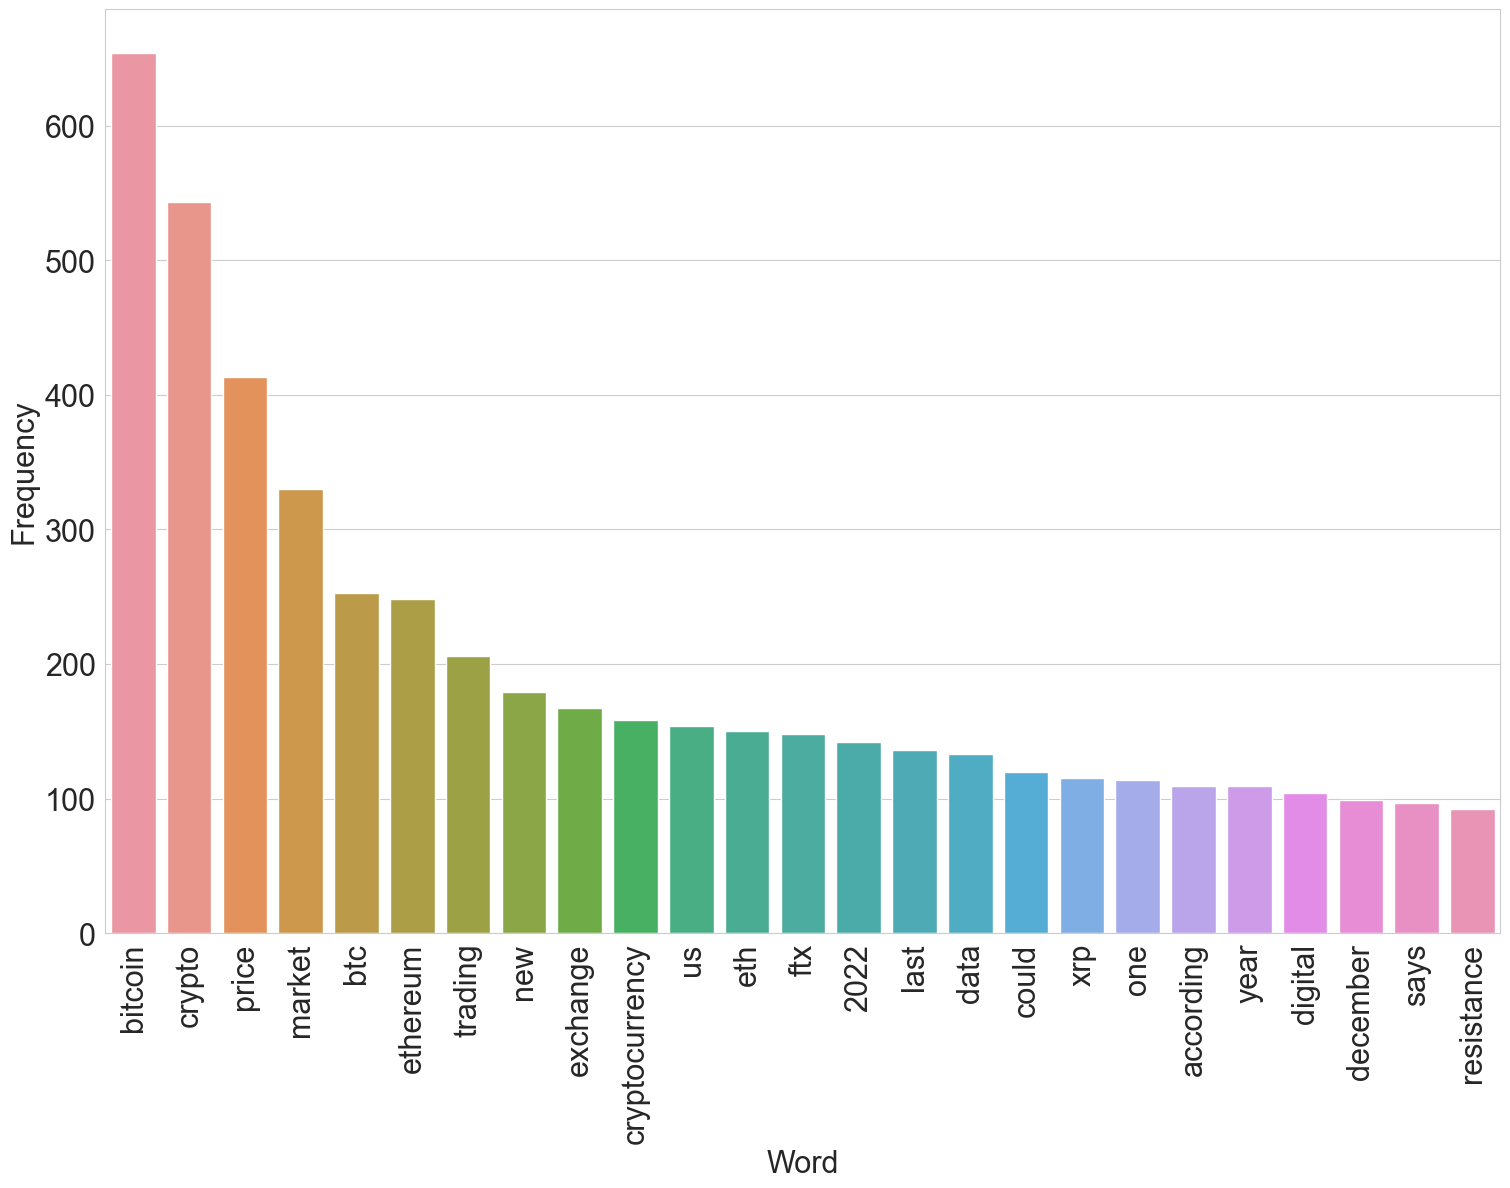

In [29]:
plt.figure(figsize=(18, 12))
sns.barplot(data=freq_title, x='Word', y='Frequency')
plt.xticks(rotation=90)

In [25]:
def find_ngrams(input_list, n):
    return list(zip(*(input_list[i:] for i in range(n))))

In [26]:
bigrams = find_ngrams(words, 2)

In [27]:
bigrams_dist = nltk.FreqDist(bigrams)
bigram_freq_title = pd.DataFrame(bigrams_dist.most_common(top_N),
                    columns=['N-gram', 'Frequency'])
bigram_freq_title

,N-gram,Frequency
0,"(bitcoin, btc)",97
1,"(ethereum, eth)",60
2,"(crypto, market)",53
3,"(bitcoin, price)",48
4,"(crypto, exchange)",47
5,"(bear, market)",41
6,"(24, hours)",39
7,"(moving, average)",38
8,"(us, dollar)",37
9,"(price, trading)",37


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, "('bitcoin', 'btc')"),
  Text(1, 0, "('ethereum', 'eth')"),
  Text(2, 0, "('crypto', 'market')"),
  Text(3, 0, "('bitcoin', 'price')"),
  Text(4, 0, "('crypto', 'exchange')"),
  Text(5, 0, "('bear', 'market')"),
  Text(6, 0, "('24', 'hours')"),
  Text(7, 0, "('moving', 'average')"),
  Text(8, 0, "('us', 'dollar')"),
  Text(9, 0, "('price', 'trading')"),
  Text(10, 0, "('market', 'cap')"),
  Text(11, 0, "('digital', 'asset')"),
  Text(12, 0, "('cryptocurrency', 'market')"),
  Text(13, 0, "('simple', 'moving')"),
  Text(14, 0, "('btc', 'price')"),
  Text(15, 0, "('data', 'shows')"),
  Text(16, 0, "('bitcoin', 'mining')"),
  Text(17, 0, "('last', '24')"),
  Text(18, 0, "('price', 'prediction')"),
  Text(19, 0, "('trend', 'line')"),
  Text(20, 0, "('price', 'action')"),
  Text(21, 0, "('last', 'week')"),
  Text(22, 0, "('onchain', 'data')"),
  Text(23, 0, "('to

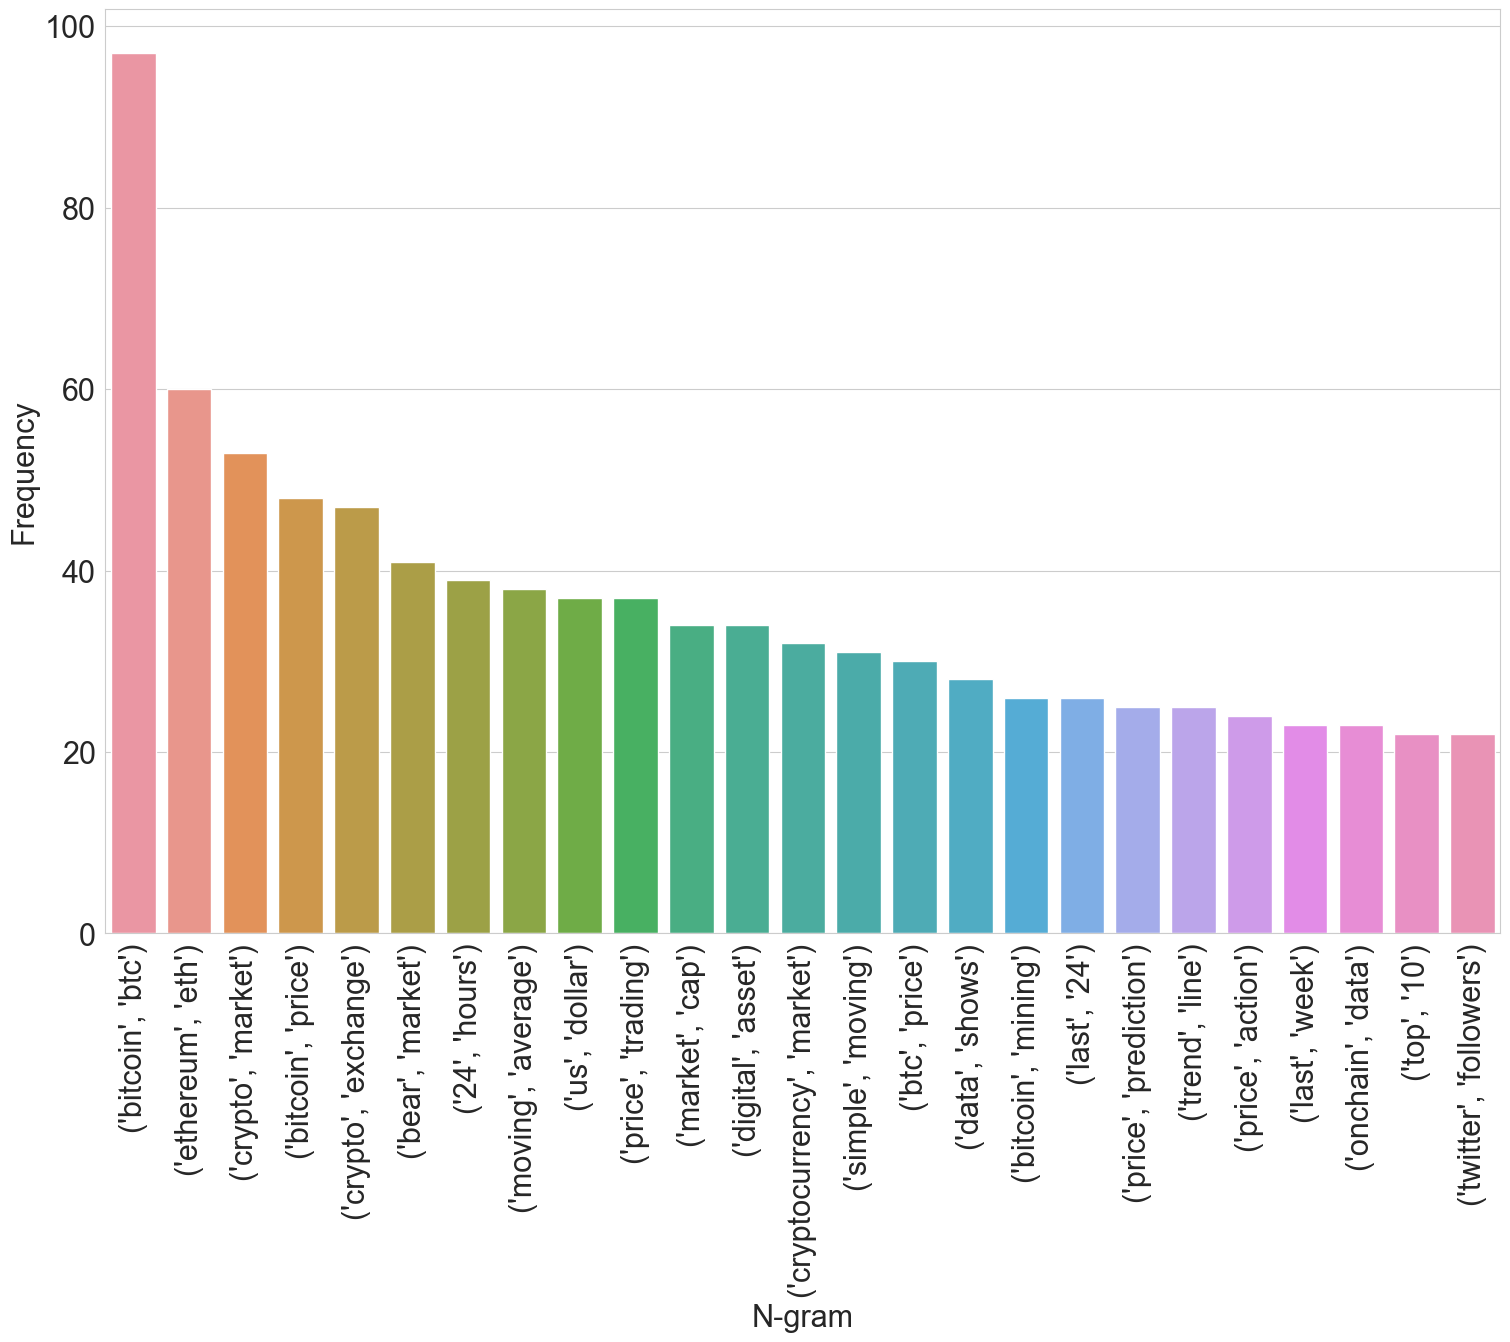

In [30]:
plt.figure(figsize=(18, 12))
sns.barplot(data=bigram_freq_title, x='N-gram', y='Frequency')
plt.xticks(rotation=90)

In [80]:
trigrams = find_ngrams(words, 3)

In [81]:
trigrams_dist = nltk.FreqDist(trigrams)
trigram_freq_title = pd.DataFrame(trigrams_dist.most_common(top_N),
                    columns=['N-gram', 'Frequency'])
trigram_freq_title

,N-gram,Frequency
0,"(simple, moving, average)",31
1,"(last, 24, hours)",25
2,"(securities, exchange, commission)",19
3,"(exchange, commission, sec)",16
4,"(moving, average, 4hours)",16
5,"(bearish, trend, line)",16
6,"(trend, line, forming)",15
7,"(100, hourly, simple)",15
8,"(hourly, simple, moving)",15
9,"(zone, us, dollar)",13


In [94]:
cv = CountVectorizer(analyzer='word')
cv_data = cv.fit_transform(data['description'])
dtm_data = pd.DataFrame(cv_data.toarray(), columns=cv.get_feature_names_out())
dtm_data.index = data.index
dtm_data.head(5)

,00,000,00001,01,018,02,03,030,04,05,...,zeldin,zero,zhao,zilliqa,zk,zk_nhpq0,zkevm,zksync,zone,zuckerberg
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
dtm_data.T.sum(axis=1)

00             21
000           145
00001           1
01              4
018             3
             ... 
zk_nhpq0        1
zkevm           9
zksync          2
zone           39
zuckerberg      1
Length: 6560, dtype: int64

In [84]:
assets = ['100.png', '500.png', 'cloud.png', 'thumb-down.png', 'thumb-up.png']

In [86]:
assets_url = 'https://raw.githubusercontent.com/StepanTita/fds-final-project/main/assets/'
for asset in assets:
    response = requests.get(assets_url + asset)
    print(response)
    open(f'./assets/{asset}', "wb").write(response.content)

<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>


In [87]:
ASSETS_PATH = './assets'

In [89]:
# Function for generating word clouds
def generate_wordcloud(data, title, bg='black', colormap='Dark2', mask=None):
    wc = WordCloud(width=1600, height=1080, max_words=150, colormap=colormap, mask=mask, background_color=bg).generate_from_frequencies(data)
    plt.figure(figsize=(16,12))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title('\n'.join(wrap(title,60)),fontsize=26)
    plt.show()

In [106]:
cloud_mask = np.array(Image.open(ASSETS_PATH + '/thumb-up.png'))

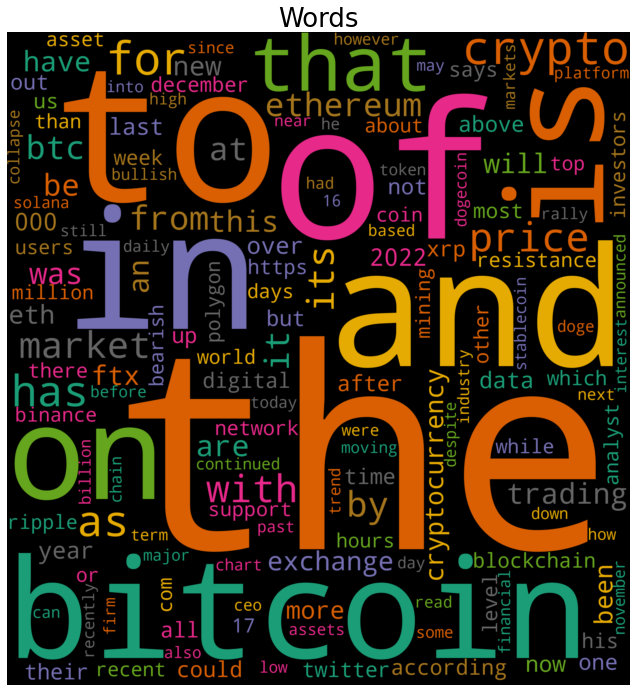

In [107]:
generate_wordcloud(dtm_data.T.sum(axis=1), 'Words', mask=cloud_mask)

In [145]:
TRIM_QUANTILE = 0.2

In [146]:
stopwords = list(freq_title[freq_title['Frequency'] < freq_title['Frequency'].quantile(TRIM_QUANTILE)]['Word'])
vec_vocab = list(freq_title[freq_title['Frequency'] >= freq_title['Frequency'].quantile(TRIM_QUANTILE)]['Word'])

In [147]:
tfidf_vectorizer = TfidfVectorizer(analyzer='word', stop_words=stopwords, vocabulary=vec_vocab)
tfidf_vectorizer

TfidfVectorizer(stop_words=['markets', 'assets', 'still', 'collapse',
                            'continued', 'platform', 'since'],
                vocabulary=['bitcoin', 'crypto', 'price', 'market', 'btc',
                            'ethereum', 'trading', 'new', 'exchange',
                            'cryptocurrency', 'us', 'eth', 'ftx', '2022',
                            'last', 'data', 'could', 'xrp', 'one', 'according',
                            'year', 'digital', 'december', 'says', 'resistance',
                            'twitter', 'investors', 'level', 'time', 'support', ...])

In [148]:
tfidf_matrix = tfidf_vectorizer.fit_transform(data['description'])
tfidf_matrix

<1336x43 sparse matrix of type '<class 'numpy.float64'>'
	with 5189 stored elements in Compressed Sparse Row format>

In [149]:
tfidf_data = pd.DataFrame(tfidf_matrix.toarray())
tfidf_data

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0.285493,0.000000,0.379654,0.000000,0.408868,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.59006,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0
1,0.000000,0.152294,0.000000,0.179712,0.000000,0.390095,0.0,0.000000,0.219957,0.0,...,0.0,0.00000,0.000000,0.00000,0.0,0.000000,0.269908,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.280754,0.0,0.000000,0.000000,0.0,...,0.0,0.00000,0.728895,0.38158,0.0,0.000000,0.000000,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.0,...,0.0,0.00000,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.00000,1.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1331,0.000000,0.000000,0.000000,0.000000,0.000000,0.648166,0.0,0.000000,0.000000,0.0,...,0.0,0.00000,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0
1332,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.00000,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0
1333,0.152138,0.518116,0.000000,0.000000,0.217884,0.000000,0.0,0.000000,0.249438,0.0,...,0.0,0.00000,0.000000,0.00000,0.0,0.300625,0.306083,0.0,0.0,0.0
1334,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.624451,0.000000,0.0,...,0.0,0.00000,0.000000,0.00000,0.0,0.000000,0.781064,0.0,0.0,0.0


In [150]:
feature_names = tfidf_vectorizer.get_feature_names_out()
feature_names

array(['bitcoin', 'crypto', 'price', 'market', 'btc', 'ethereum',
       'trading', 'new', 'exchange', 'cryptocurrency', 'us', 'eth', 'ftx',
       '2022', 'last', 'data', 'could', 'xrp', 'one', 'according', 'year',
       'digital', 'december', 'says', 'resistance', 'twitter',
       'investors', 'level', 'time', 'support', 'recent', 'network',
       'week', 'bearish', 'million', 'blockchain', 'users', 'analyst',
       'asset', 'top', 'bitcoins', 'mining', 'days'], dtype=object)

In [151]:
tfidf_data.columns = feature_names
tfidf_data

,bitcoin,crypto,price,market,btc,ethereum,trading,new,exchange,cryptocurrency,...,bearish,million,blockchain,users,analyst,asset,top,bitcoins,mining,days
0,0.285493,0.000000,0.379654,0.000000,0.408868,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.59006,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0
1,0.000000,0.152294,0.000000,0.179712,0.000000,0.390095,0.0,0.000000,0.219957,0.0,...,0.0,0.00000,0.000000,0.00000,0.0,0.000000,0.269908,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.280754,0.0,0.000000,0.000000,0.0,...,0.0,0.00000,0.728895,0.38158,0.0,0.000000,0.000000,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.0,...,0.0,0.00000,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.00000,1.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1331,0.000000,0.000000,0.000000,0.000000,0.000000,0.648166,0.0,0.000000,0.000000,0.0,...,0.0,0.00000,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0
1332,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.00000,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0
1333,0.152138,0.518116,0.000000,0.000000,0.217884,0.000000,0.0,0.000000,0.249438,0.0,...,0.0,0.00000,0.000000,0.00000,0.0,0.300625,0.306083,0.0,0.0,0.0
1334,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.624451,0.000000,0.0,...,0.0,0.00000,0.000000,0.00000,0.0,0.000000,0.781064,0.0,0.0,0.0


In [154]:
#tsvd = TruncatedSVD(n_components=100, random_state=37)
vec_matrix_tsvd = tfidf_matrix#tsvd.fit_transform(tfidf_matrix)
vec_matrix_tsvd

<1336x43 sparse matrix of type '<class 'numpy.float64'>'
	with 5189 stored elements in Compressed Sparse Row format>

In [155]:
def to_viz_data(data, tfidf_data, labels):
    transformed_data = []
    for label in labels:
        new_data = tfidf_data[tfidf_data[data['label'] == label].idxmax(axis=1)].max()[:200]
        transformed_data.append(pd.concat([new_data.reset_index(), pd.Series([label] * len(new_data))], axis=1))
    viz_data = pd.concat(transformed_data)
    viz_data.columns = ['word', 'tfidf', 'label']
    return viz_data

In [156]:
clst10 = KMeans(n_clusters=3, verbose=0, random_state=37)
clst10.fit(vec_matrix_tsvd)

KMeans(n_clusters=3, random_state=37)

In [157]:
data['label'] = clst10.labels_
data

,source,title,published_at,currencies,News value,full_news_url,description,label
0,CoinTelegraph,Bitcoin options data shows bulls aiming for $1...,2022-12-07T19:12:11Z,BTC,1.0,https://cryptopanic.com/news/17094680/Bitcoin-...,BTC bulls could secure a $130 million profit i...,1
1,The Daily Hodl,Crypto Exchange Coinbase Adds Support for Two ...,2022-12-07T19:05:54Z,"ETH,RPL",0.0,https://cryptopanic.com/news/17094653/Crypto-E...,Top US crypto exchange Coinbase has given supp...,0
2,The Daily Hodl,BitKeep Wallet Goes Live With .Bayc and Other ...,2022-12-07T19:05:16Z,ETH,0.0,https://cryptopanic.com/news/17094654/BitKeep-...,"December 5, 2022 As simplified wallet addresse...",0
3,Bitcoin Magazine,Kazakhstan Presses On With Restrictive Bitcoin...,2022-12-07T18:53:00Z,BTC,0.0,https://cryptopanic.com/news/17094603/Kazakhst...,A bill that would create new licensing and ele...,0
4,CoinTelegraph,The blockchain trilemma: Can it ever be tackled?,2022-12-07T18:33:00Z,"ETH,MATIC",0.0,https://cryptopanic.com/news/17094549/The-bloc...,Blockchain trilemma is arguably the hardest te...,0
...,...,...,...,...,...,...,...,...
1331,U.Today,Ethereum (ETH) Price Analysis for December 23,2022-12-23T20:00:00Z,ETH,0.0,https://cryptopanic.com/news/17226113/Ethereum...,How great are chances for continued rise of Et...,0
1332,ZyCrypto,Digital Assets Amongst Vulnerabilities Within ...,2022-12-23T19:47:30Z,"ETH,XRP",0.0,https://cryptopanic.com/news/17226085/Digital-...,The Financial Stability Oversight Council (FSO...,0
1333,The Daily Hodl,"Cardano, Litecoin and Monero Will Not Be Added...",2022-12-23T19:41:41Z,"BTC,ETH,ADA,LTC,XMR",1.0,https://cryptopanic.com/news/17226084/Cardano-...,A top executive of peer-to-peer crypto exchang...,2
1334,ZyCrypto,Binance plans to invest in India’s web3 startu...,2022-12-23T19:24:08Z,"BTC,ETH,XRP",1.0,https://cryptopanic.com/news/17226053/Binance-...,Binance’s Chief Technology Officer (CTO) Rohit...,0


In [158]:
labels_count_data = data[['description', 'label', 'News value']].groupby(['label', 'description']).count()
labels_count_data

News value
label description                                                   
0     \tDogecoin has gained over 100% in the last ten...           1
      \tHelium Network has announced its partnership ...           1
      \n.\n@Meta\n has selected \n@0xpolygon\n for mi...           1
      \nXRP is experiencing sustained buying pressure...           1
                              Margin trading and futu...           1
...                                                              ...
2     With its partial autonomy, the island city of H...           1
      Zamsino Crypto Casino Metaverse, a blockchain-b...           1
      [Crypto News]💸 BYBIT 0% Maker Fees & $30,030 BO...           1
      ✴︎ Sign Up Here for the CT Club! https://patreo...           1
      🟢 10X Your Trades w/ Our Strategies: https://el...           1

[1336 rows x 1 columns]

In [159]:
assign_ratio = labels_count_data.reset_index()['label'].value_counts() / labels_count_data.shape[0]
assign_ratio

0    0.512725
1    0.296407
2    0.190868
Name: label, dtype: float64

In [160]:
flat_labels_count_data = labels_count_data.reset_index()
for i in assign_ratio.index:
    flat_labels_count_data.loc[flat_labels_count_data['label'] == i, 'ratio'] = assign_ratio.loc[i]
flat_labels_count_data.groupby(['label', 'ratio', 'description']).first(5)

News value
label ratio    description                                                   
0     0.512725 \tDogecoin has gained over 100% in the last ten...           1
               \tHelium Network has announced its partnership ...           1
               \n.\n@Meta\n has selected \n@0xpolygon\n for mi...           1
               \nXRP is experiencing sustained buying pressure...           1
                                       Margin trading and futu...           1
...                                                                       ...
2     0.190868 With its partial autonomy, the island city of H...           1
               Zamsino Crypto Casino Metaverse, a blockchain-b...           1
               [Crypto News]💸 BYBIT 0% Maker Fees & $30,030 BO...           1
               ✴︎ Sign Up Here for the CT Club! https://patreo...           1
               🟢 10X Your Trades w/ Our Strategies: https://el...           1

[1336 rows x 1 columns]

In [161]:
viz_data = to_viz_data(data, tfidf_data, data['label'].unique())
viz_data

,word,tfidf,label
0,million,1.0,1
1,btc,1.0,1
2,time,1.0,1
3,bitcoin,1.0,1
4,mining,1.0,1
...,...,...,...
195,crypto,1.0,2
196,ftx,1.0,2
197,blockchain,1.0,2
198,crypto,1.0,2


In [174]:
def visualize_clusters(viz_data):
    viz_data = viz_data.copy()
    viz_data['label'] += np.abs(viz_data['label'].min())
    viz_data = viz_data.sort_values('label').groupby('label').head(10)
    fig = px.scatter(viz_data, x='label', y='tfidf', color='label', text='word', hover_data=['label', 'tfidf', 'word'])
    fig.update_layout(
        font=dict(
            family='Courier New, monospace',
            size=18,  # Set the font size here
            color='black'
        ),
        xaxis = dict(
            tickmode = 'linear',
            tick0 = 0,
            dtick = 1
        ),
        yaxis = dict(
            tickmode = 'linear',
            tick0 = 0,
            dtick = 0.05
        )
    )
    fig.update_traces(mode='text', selector=dict(type='scatter'), textfont_size=(viz_data['tfidf'] * 10 ** 1.5).values)
    fig.for_each_trace(lambda t: t.update(textfont_color=np.array(px.colors.qualitative.Dark24)[t.marker.color], textposition='bottom center'))
    fig.show()

In [175]:
visualize_clusters(viz_data)

In [67]:
data['combined'] = 'Source: ' + data['source'] + ' Title: ' + data['title'] + ' Description: ' + data['description']
data['combined']

0                                                    NaN
1      Source: CoinTelegraph Title: Bitcoin options d...
2      Source: The Daily Hodl Title: Crypto Exchange ...
3      Source: The Daily Hodl Title: BitKeep Wallet G...
4      Source: Bitcoin Magazine Title: Kazakhstan Pre...
                             ...                        
873    Source: The Daily Hodl Title: DeFiChain’s Much...
874                                                  NaN
875    Source: Blockworks Title: Ex-Blockparty CTO Ar...
876    Source: NewsBTC Title: Bitcoin Price Predictio...
877    Source: The Block Title: Ethereum developers t...
Name: combined, Length: 878, dtype: object

In [68]:
data = data[~data['combined'].isna()]
data['combined']

1      Source: CoinTelegraph Title: Bitcoin options d...
2      Source: The Daily Hodl Title: Crypto Exchange ...
3      Source: The Daily Hodl Title: BitKeep Wallet G...
4      Source: Bitcoin Magazine Title: Kazakhstan Pre...
5      Source: CoinTelegraph Title: The blockchain tr...
                             ...                        
872    Source: Cryptonews Title: Ethereum Price Predi...
873    Source: The Daily Hodl Title: DeFiChain’s Much...
875    Source: Blockworks Title: Ex-Blockparty CTO Ar...
876    Source: NewsBTC Title: Bitcoin Price Predictio...
877    Source: The Block Title: Ethereum developers t...
Name: combined, Length: 699, dtype: object

In [71]:
data['combined'] = data['combined'].apply(cleanhtml)

/var/folders/l4/kkbfk_xs52n01x_2cs6bv8g40000gp/T/ipykernel_12028/2628942119.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['combined'] = data['combined'].apply(cleanhtml)


In [85]:
data = data.drop_duplicates(['combined']).reset_index(drop=True)
data

,source,title,published_at,currencies,News value,full_news_url,description,combined,source_one_hot,label
0,CoinTelegraph,Bitcoin options data shows bulls aiming for $1...,2022-12-07T19:12:11Z,BTC,1.0,https://cryptopanic.com/news/17094680/Bitcoin-...,<p>BTC bulls could secure a $130 million profi...,Source: CoinTelegraph Title: Bitcoin options d...,0,growth
1,The Daily Hodl,Crypto Exchange Coinbase Adds Support for Two ...,2022-12-07T19:05:54Z,"ETH,RPL",0.0,https://cryptopanic.com/news/17094653/Crypto-E...,<p>Top US crypto exchange Coinbase has given s...,Source: The Daily Hodl Title: Crypto Exchange ...,1,no effect
2,The Daily Hodl,BitKeep Wallet Goes Live With .Bayc and Other ...,2022-12-07T19:05:16Z,ETH,0.0,https://cryptopanic.com/news/17094654/BitKeep-...,"<p>December 5, 2022 As simplified wallet addre...",Source: The Daily Hodl Title: BitKeep Wallet G...,1,no effect
3,Bitcoin Magazine,Kazakhstan Presses On With Restrictive Bitcoin...,2022-12-07T18:53:00Z,BTC,0.0,https://cryptopanic.com/news/17094603/Kazakhst...,<p>A bill that would create new licensing and ...,Source: Bitcoin Magazine Title: Kazakhstan Pre...,2,no effect
4,CoinTelegraph,The blockchain trilemma: Can it ever be tackled?,2022-12-07T18:33:00Z,"ETH,MATIC",0.0,https://cryptopanic.com/news/17094549/The-bloc...,<p>Blockchain trilemma is arguably the hardest...,Source: CoinTelegraph Title: The blockchain tr...,0,no effect
...,...,...,...,...,...,...,...,...,...,...
684,Cryptonews,Ethereum Price Prediction with ETH Down 4.5% f...,2022-12-08T17:43:00Z,ETH,0.0,https://cryptopanic.com/news/17103762/Ethereum...,"<p>Ethereum (ETH), the cryptocurrency that pow...",Source: Cryptonews Title: Ethereum Price Predi...,7,no effect
685,The Daily Hodl,DeFiChain’s Much Anticipated ‘Grand Central’ H...,2022-12-08T17:42:49Z,BTC,1.0,https://cryptopanic.com/news/17103767/DeFiChai...,"<p>December 8, 2022 – Singapore, Singapore DeF...",Source: The Daily Hodl Title: DeFiChain’s Much...,1,growth
686,Blockworks,Ex-Blockparty CTO Arrested for Stealing Compan...,2022-12-08T17:26:18Z,BTC,0.0,https://cryptopanic.com/news/17103734/Ex-Block...,<p>Rikesh Thapa was arrested in California for...,Source: Blockworks Title: Ex-Blockparty CTO Ar...,42,no effect
687,NewsBTC,Bitcoin Price Prediction: What Elliott Wave Th...,2022-12-08T17:25:56Z,"BTC,FLOW",0.0,https://cryptopanic.com/news/17103713/Bitcoin-...,<p>Any Bitcoin price prediction is just a gues...,Source: NewsBTC Title: Bitcoin Price Predictio...,17,no effect


In [86]:
sources = list(data['source'].unique())

In [87]:
data['source_one_hot'] = data['source'].apply(lambda x: sources.index(x))
data['source_one_hot']

0       0
1       1
2       1
3       2
4       0
       ..
684     7
685     1
686    42
687    17
688    11
Name: source_one_hot, Length: 689, dtype: int64

In [88]:
data[['source_one_hot', 'News value']].corr()

,source_one_hot,News value
source_one_hot,1.000000,-0.031553
News value,-0.031553,1.000000


In [89]:
data['label'] = data['News value'].apply(lambda x: 'growth' if x == 1 else 'decay' if x == -1 else 'no effect')

In [90]:
data_input = data[['combined', 'label']].copy()
data_input.columns = ['prompt', 'completion']
data_input['prompt'] = data_input['prompt'] + '\n\n###\n\n'
data_input['completion'] = ' ' + data_input['completion'] + ' END'
data_input

,prompt,completion
0,Source: CoinTelegraph Title: Bitcoin options d...,growth END
1,Source: The Daily Hodl Title: Crypto Exchange ...,no effect END
2,Source: The Daily Hodl Title: BitKeep Wallet G...,no effect END
3,Source: Bitcoin Magazine Title: Kazakhstan Pre...,no effect END
4,Source: CoinTelegraph Title: The blockchain tr...,no effect END
...,...,...
684,Source: Cryptonews Title: Ethereum Price Predi...,no effect END
685,Source: The Daily Hodl Title: DeFiChain’s Much...,growth END
686,Source: Blockworks Title: Ex-Blockparty CTO Ar...,no effect END
687,Source: NewsBTC Title: Bitcoin Price Predictio...,no effect END


In [91]:
data_input.to_json('./output/classification/source_title_description.jsonl', orient='records', lines=True)
data_input.to_csv('./output/classification/source_title_description.csv', index=False)